# Business Understanding

Suatu perusahaan asuransi kesehatan memiliki tanggung jawab yang besar terhadap perjanjian medis yang dilakukan dengan individu/kelompok. Perusahaan akan mengalami kerugian signifikan jika salah menentukan premi asuransi. Misalnya premi yang terlalu rendah akan menyebabkan kerugian finansial saat klaim melonjak, sedangkan premi yang terlalu tinggi menyebabkan kehilangan pelanggan akibat nilai yang tidak kompetitif. Selain itu, perusahaan asuransi tersebut juga tidak dapat mengidentifikasi pasien dengan resiko tinggi yang berkemungkinan dapat ditawarkan program kesehatan khusus.

Oleh karena itu, penting bagi perusahaan asuransi kesehatan untuk mengetahui dan dapat memprediksi kejadian di masa depan dengan menggunakan suatu sistem. Hal ini akan berdampak positif pada penyusunan anggaran, perencanaan risiko, dan penyesuaian strategi akan mengandalkan teknologi atau automation judgement, yang mana dapat membantu pengambilan keputusan dan prosesnya tidak memakan waktu lama.

**Problem Statements**
- Dari serangkaian atribut(fitur) yang ada, atribut(fitur) apa yang paling berpengaruh terhadap biaya medis (charge) asuransi?
- Bagaimana cara memprediksi biaya medis (charges) yang akan dikeluarkan seseorang berdasarkan fitur yang ada?

**Goals**
- Mengetahui atribut(fitur) yang paling berkorelasi dengan biaya medis (charges)
- Membuat machine learning yang dapat memprediksi biaya medis (charges) berdasarkan fitur yang ada

**Solution statements**
- Membangun model baseline menggunakan Linear Regression.
- Membangun model alternatif menggunakan Random Forest dan Gradient Boost.
- Mengukur performa model menggunakan MAE, MSE, dan R2 Score.
- Memilih model terbaik berdasarkan nilai MAE dan MSE terendah serta R2 Score tertinggi

# Data Understanding

Dataset yang digunakan merupakan dataset publik yang banyak digunakan dalam pembelajaran machine learning, terutama untuk studi kasus regresi yaitu Medical Cost Personal Dataset yang diperoleh dari Kaggle. Dataset memiliki jumlah sampel 1.338 baris. Terdapat beberapa fitur non-numerik seperti "sex", "smoker", "region". Beberapa fitur numerik seperti "age", "bmi", "children", "charges". Berdasarkan struktur penamaan wilayah (southeast, southwest, northeast, northwest) serta tingginya nilai biaya medis (charges), dataset ini sangat besar kemungkinan berasal dari konteks layanan kesehatan di Amerika Serikat.

**Variabel-variabel pada Medical Cost Personal dataset adalah sebagai berikut:**
- Age: usia pelanggan/pasien
- Sex: jenis kelamin pelanggan/pasien
- Bmi: indeks masa tubuh pelanggan/pasien
- Children: tanggungan anak pelanggan/pasien
- Smoker: status perokok pelanggan/pasien
- Region: wilayah tempat tinggal pelanggan/pasien
- Charges: biaya medis pelanggan/pasien

Link dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Loading

In [2]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Terdapat 1.338 baris dalam dataset
- Terdapat 7 kolom yaitu: age, sex, bmi, children, smoker, region, charges

## Exploratory Data Analysis

In [3]:
# Deskripsi fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Terdapat 3 kolom bertipe object yaitu sex, smoker, region. Kolom ini termasuk kolom non-numerik
- Terdapat 2 kolom bertipe integer yaitu age dan children
- Terdapat 2 kolom bertipe float yaitu bmi dan charges

In [4]:
# Deskripsi statistik
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Deskripsi statistik di atas dinilai normal, tidak terdapat indikasi atau logika yang tidak masuk akal

<Axes: xlabel='age'>

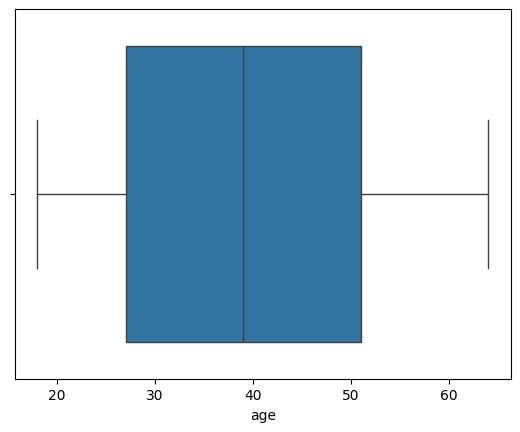

In [5]:
# Mendeteksi outlier

# Fitur age
sns.boxplot(x=df["age"])

<Axes: xlabel='bmi'>

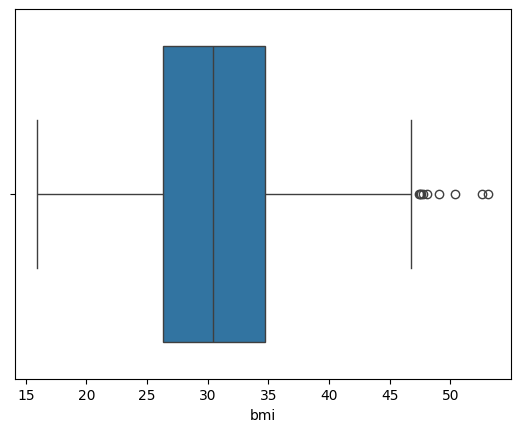

In [6]:
# Fitur bmi
sns.boxplot(x=df["bmi"])

<Axes: xlabel='charges'>

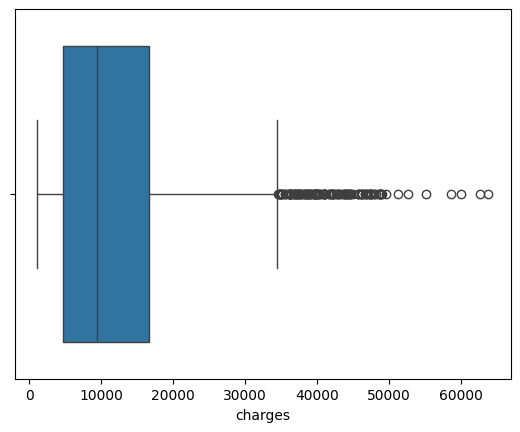

In [7]:
# Fitur charges
sns.boxplot(x=df["charges"])

Terdapat outlier pada fitur bmi dan biaya medis (charges). Tetapi hal ini dianggap normal, sebab nilai BMI masih masuk akal direntang 10-60. Kemudian nilai charges dibiarkan, sebab kita menginginkan model memprediksi nilai ekstrem, sebagai bahan prediksi perusahaan asuransi dengan berbagai faktor yang ada

### Univariate Analysis

Melakukan analisis terhadap masing-masing fitur (univariate)

In [8]:
# Membuat variabel berdasarkan jenis fitur
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children", "charges"]

Categorical Features

        Jumlah sampel  Persentase
sex                              
male              676        50.5
female            662        49.5


<Axes: title={'center': 'sex'}, xlabel='sex'>

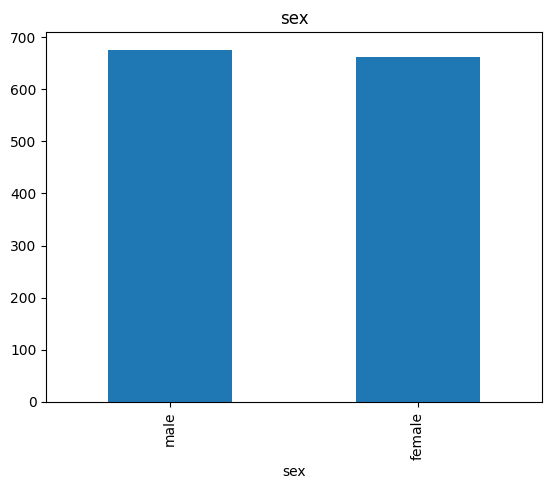

In [9]:
# Fitur sex
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sex = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_sex)
count.plot(kind='bar', title=feature)

Dari data persentase di atas dapat disimpulkan bahwa jenis kelamin laki-laki dan perempuan pada dataset hampir seimbang di angka 50.5% (675 sampel) dan 49.5% (662 sampel)

        Jumlah sampel  Persentase
smoker                           
no               1064        79.5
yes               274        20.5


<Axes: title={'center': 'smoker'}, xlabel='smoker'>

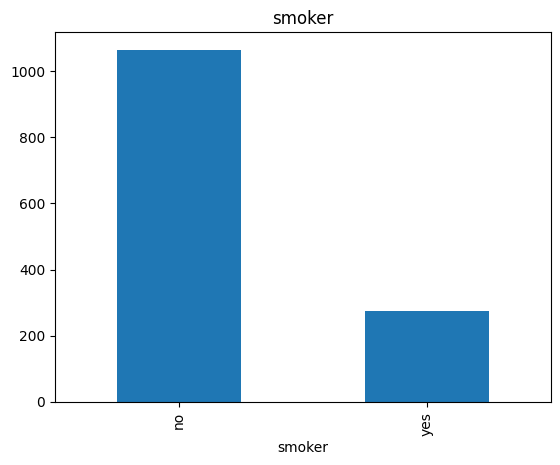

In [10]:
# Fitur smoker
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_smoker = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_smoker)
count.plot(kind='bar', title=feature)

Dari data persentase di atas dapat disimpulkan bahwa 20% pelanggan/pasien merupakan perokok. Selebihnya merupakan status perokok tidak aktif. Hal ini menandakan bahwa lebih dari setengah pelanggan/pasien dari perusahaan asuransi bukan perokok

           Jumlah sampel  Persentase
region                              
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


<Axes: title={'center': 'region'}, xlabel='region'>

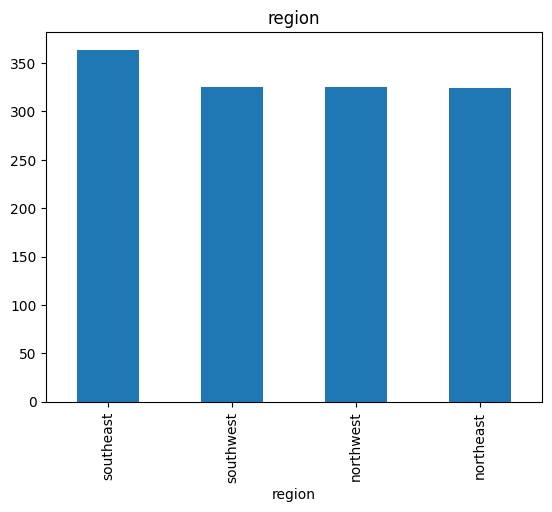

In [11]:
# Fitur region
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_region = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_region)
count.plot(kind='bar', title=feature)

Dari data persentase di atas dapat disimpulkan bahwa pelanggan/pasien terbanyak berasal dari region southeast dengan 27.2%, selebihnya sama rata berasal dari region lain (southwest, northwest, northeast)

Numerical Features

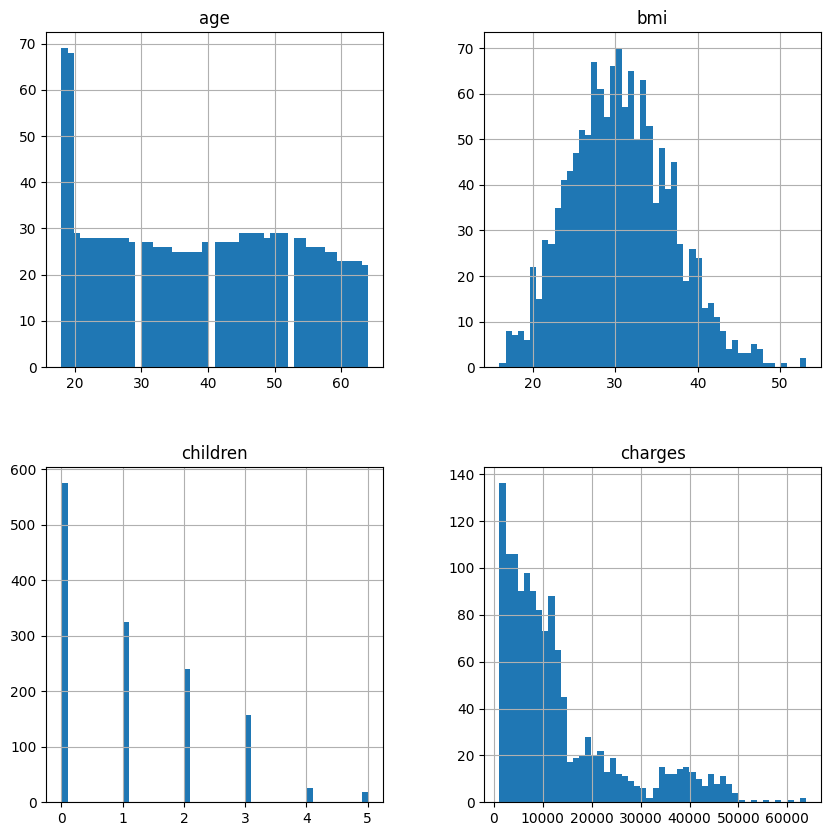

In [12]:
df.hist(bins=50, figsize=(10,10))
plt.show()

Berdasarkan histogram ini dapat kita simpulkan sebagai berikut.
- Rentang usia terbilang cukup luas, dengan konsentrasi yang lebih tinggi pada usia muda
- Distribusi BMI cenderung mengikuti pola normal dengan sebagian besar nilai berada di rentang yang umum
- Sebagian besar pelanggan/pasien tidak memiliki anak
- Biaya medis yang dikenakan sangat bervariasi, dengan sebagian besar berada di tingkat yang lebih rendah dan sebagian kecil dengan biaya yang jauh lebih tinggi.

Berikut adalah kategori BMI berdasarkan rentang nilai:
- < 18.5: Kekurangan Berat Badan (Underweight)
- 18.5 - 24.9: Berat Badan Normal (Normal weight)
- 25.0 - 29.9: Kelebihan Berat Badan (Overweight)
- 30.0 - 34.9: Obesitas Tingkat 1 (Obesity Class I)
- 35.0 - 39.9: Obesitas Tingkat 2 (Obesity Class II)
- Lebih dari 40.0: Obesitas Tingkat 3 (Obesity Class III)

### Multivariate Analysis

Melakukan analisis menilai relasi antar fitur terhadap fitur target (charges)


Categorical Features

<ipython-input-13-0b6515f4548c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=column, y="charges", kind="bar", dodge=False, height=3, aspect=2, data=df, palette="Set2")
<ipython-input-13-0b6515f4548c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=column, y="charges", kind="bar", dodge=False, height=3, aspect=2, data=df, palette="Set2")
<ipython-input-13-0b6515f4548c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=column, y="charges", kind="bar", dodge=False, height=3, aspect=2, data=df, palette="Set2")


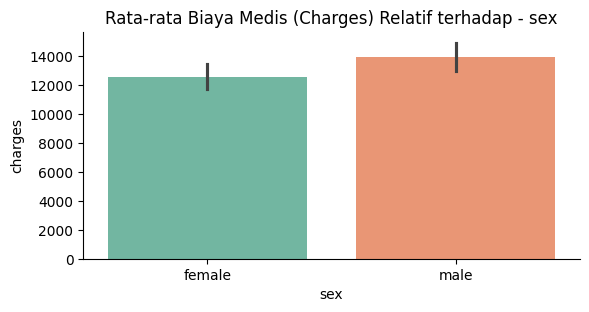

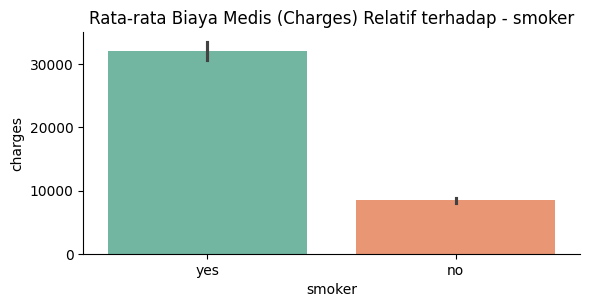

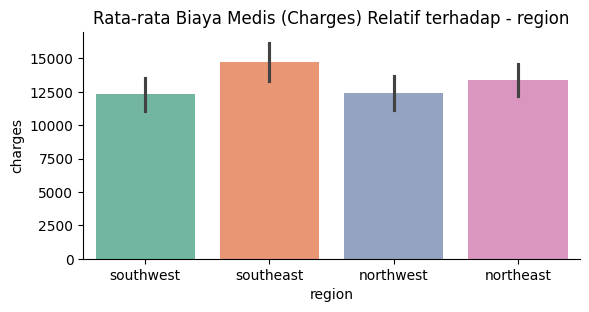

In [13]:
# Melihat rata-rata biaya medis (charges) terhadap fitur kategori
for column in categorical_features:
  sns.catplot(x=column, y="charges", kind="bar", dodge=False, height=3, aspect=2, data=df, palette="Set2")
  plt.title("Rata-rata Biaya Medis (Charges) Relatif terhadap - {}".format(column))

Dengan mengamati rata-rata biaya medis (charges) relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:
- Pada fitur sex, rata-rata biaya medis untuk laki-laki cenderung lebih tinggi dibandingkan dengan rata-rata biaya medis untuk perempuan. Meskipun dengan adanya perbedaan rata-rata biaya medis antara laki-laki dan perempuan, fitur sex memiliki pengaruh atau dampak yang kecil terhadap rata-rata biaya medis. Gender bukan menjadi patokan untuk biaya medis yang tinggi.
- Pada fitur smoker, kebiasaan merokok memiliki pengaruh yang sangat besar terhadap rata-rata biaya medis. Secara spesifik, rata-rata biaya medis untuk perokok jauh lebih tinggi dibandingkan dengan rata-rata biaya medis untuk bukan perokok. Sehingga fitur smoker, memiliki pengaruh atau dampak yang besar terhadap rata-rata biaya medis.
- Pada fitur region, perbedaan rata-rata biaya medis antar wilayah memang ada, tetapi perbedaannya relatif lebih kecil. Sehingga fitur region memiliki pengaruh atau dampak yang kecil terhadap rata-rata biaya medis.

Numeric Features

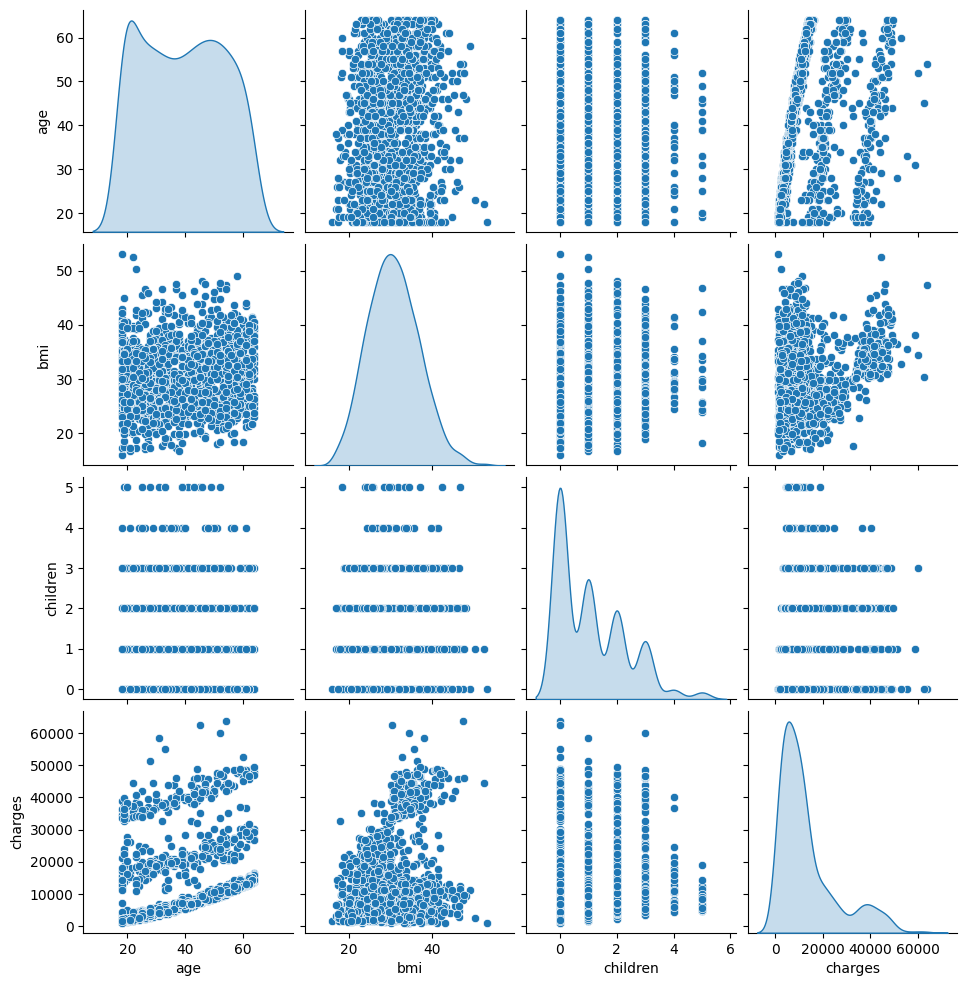

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

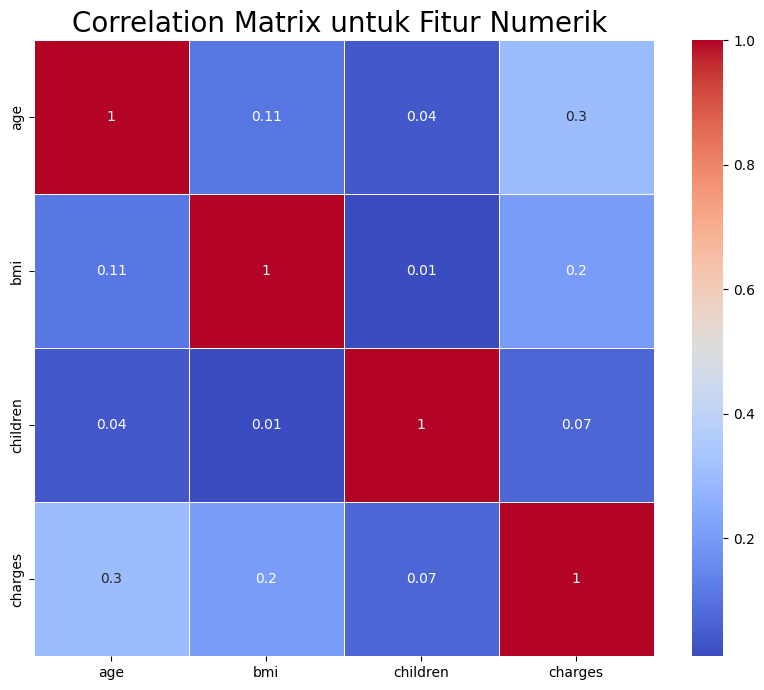

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Jika kita amati, fitur age (0.30) dan bmi (0.20) memiliki skor korelasi yang terindikasi positif dengan fitur target charges. Artinya, fitur charges berkorelasi dengan dua fitur tersebut. Sementara itu, fitur children memiliki korelasi yang sangat kecil (0.07). Sehingga, fitur tersebut dapat di-drop. Fitur ini akan di-drop pada tahap preparation

# Data Preparation

Pada bagian ini, kita melakukan lima tahap persiapan data, yaitu:
1. Menangani Duplikasi Data
2. Mengecek Missing Value
3. Seleksi Fitur
4. Encoding fitur kategori
5. Pembagian dataset dengan fungsi train_test_split dari library sklearn.
6. Standarisasi.

1. Menangani Duplikasi Data

In [16]:
# Mengecek duplikasi data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  1


In [17]:
# Drop duplikasi data
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

Terdapat indikasi duplikasi data berjumlah 1 sehingga perlu untuk meghapus baris data tersebut. Jumlah baris sekarang menjadi 1.337 baris

2. Mengecek Missing Value

In [18]:
# Mengecek missing value
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Tidak terdapat nilai yang hilang pada dataset di setiap baris dan kolomnya

3. Seleksi Fitur

In [19]:
df.drop(["children"], inplace=True, axis=1)
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


Fitur children memiliki korelasi yang sangat kecil (0.07) terhadap biaya medis (charges), sehingga dapat di-drop

4. Encoding Fitur Kategori

Encoding fitur kategori menggunakan OneHotEncoding dan LabelEncoder. Hal ini dilakukan sebab model regresi membutuhkan input numerik, maka dari itu fitur kategori yang bertipe object di rubah menjadi numerik agar model mengenali data kategorikal

In [20]:
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df = pd.get_dummies(df, columns=["region"], dtype=int)
df.head()

,age,sex,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,1,16884.92400,0,0,0,1
1,18,1,33.770,0,1725.55230,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,1,0
3,33,1,22.705,0,21984.47061,0,1,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0


5. Train Test Split

Membagi dataset menjadi data train dan data test dengan perbandingan 80:20, sebab data yang kita miliki berada di kisaran 1000an sampel sehingga ini menjadi ideal. Hal ini dilakukan guna melakukan tahap training pada model menggunakan data train, lalu melakukan tahap evaluasi menggunakan data test

In [21]:
X = df.drop(["charges"], axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(f'Total sampel dataset keseluruhan: {len(X)}')
print(f'Total sampel dataset latihan (train): {len(X_train)}')
print(f'Total sampel dataset uji (test): {len(X_test)}')

Total sampel dataset keseluruhan: 1337
Total sampel dataset latihan (train): 1069
Total sampel dataset uji (test): 268


6. Standarisasi

Standarisasi (scaling) menggunakan StandardScaler terhadap data yang telah displit sebelumnya. StandardScaler menghasilkan distribusi angka rentang 1,0,-1. Hal ini dilakukan agar algoritma stidak terpengaruh oleh perbedaan skala antar fitur.

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modeling

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. Linear Regression
2. Random Forest
3. Gradient Boost

Linear Regression

In [24]:
# Definisikan model
LR = LinearRegression()

# Latih model
LR.fit(X_train, y_train)

# Prediksi dengan model
pred_LR = LR.predict(X_test)

# Hitung metrik evaluasi
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 4141.224499848826
MSE: 38156957.89109163
R²: 0.7923499390879566


Random Forest Regressor

In [25]:
# Definisikan model
RF = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=123, n_jobs=-1)

# Latih model
RF.fit(X_train, y_train)

# Prediksi dengan model
pred_RF = RF.predict(X_test)

# Hitung metrik evaluasi
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF = mean_squared_error(y_test, pred_RF)
r2_RF = r2_score(y_test, pred_RF)

print(f"MAE: {mae_RF}")
print(f"MSE: {mse_RF}")
print(f"R²: {r2_RF}")

MAE: 2705.0969700638325
MSE: 22177523.662600297
R²: 0.8793099766348935


Gradient Boosting

In [26]:
# Definisikan model
GB = GradientBoostingRegressor(n_estimators=150, max_depth=3, learning_rate=0.05, random_state=42)

# Latih model
GB.fit(X_train, y_train)

# Prediksi dengan model
pred_GB = GB.predict(X_test)

# Hitung metrik evaluasi
mae_GB = mean_absolute_error(y_test, pred_GB)
mse_GB = mean_squared_error(y_test, pred_GB)
r2_GB = r2_score(y_test, pred_GB)

print(f"MAE: {mae_GB}")
print(f"MSE: {mse_GB}")
print(f"R²: {r2_GB}")

MAE: 2403.8262744189965
MSE: 18097718.558317255
R²: 0.9015122648998976


# Evaluasi Model

Setiap model dilatih dan diuji menggunakan data yang sudah disiapkan. Model dievaluasi dengan metrik berikut:
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- R2 Score (Koefisien Determinasi)

In [27]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_LR, mae_RF, mae_GB],
    'MSE': [mse_LR, mse_RF, mse_GB],
    'R²': [r2_LR, r2_RF, r2_GB]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=["Linear Regression", "Random Forest", "Gradient Boosting"])
df_results.round(2)

,MAE,MSE,R²
Linear Regression,4141.22,38156957.89,0.79
Random Forest,2705.10,22177523.66,0.88
Gradient Boosting,2403.83,18097718.56,0.90


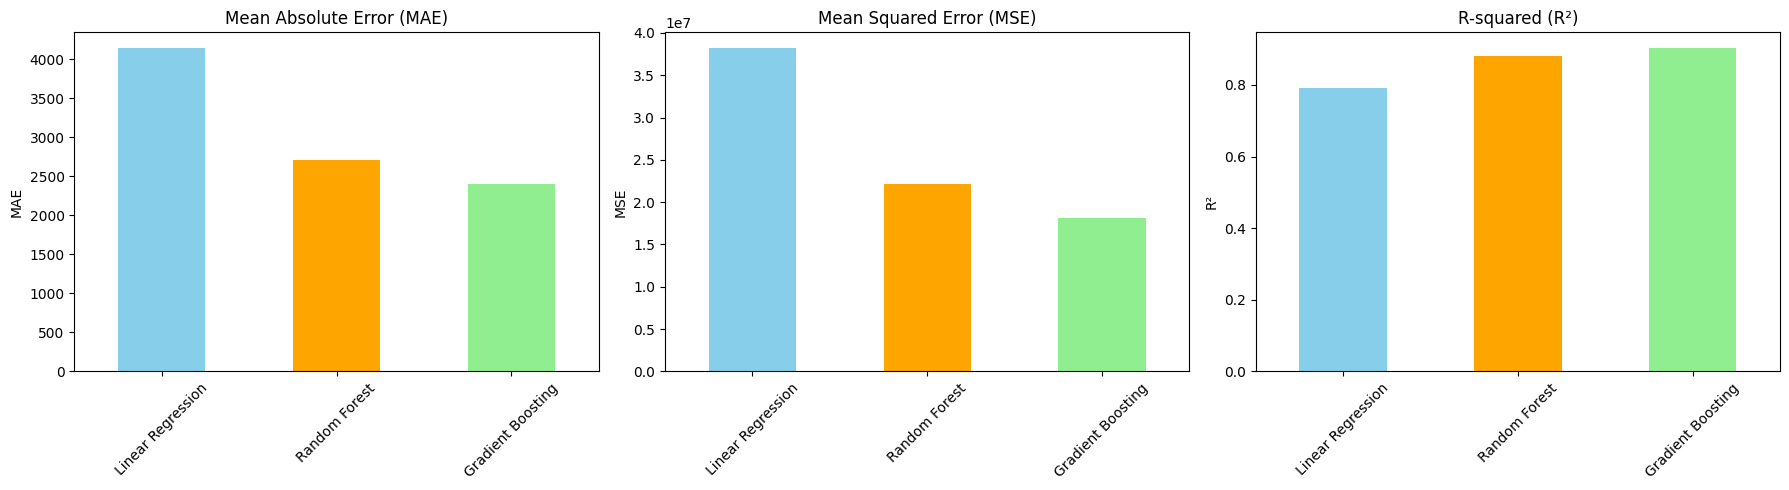

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
colors = ['skyblue', 'orange', 'lightgreen']

# MAE
df_results['MAE'].plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# MSE
df_results['MSE'].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

# R²
df_results['R²'].plot(kind='bar', ax=axes[2], color=colors)
axes[2].set_title('R-squared (R²)')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Dari hasil tersebut, dapat disimpulkan bahwa Gradient Boosting Regressor menunjukkan performa terbaik karena memiliki:

- Nilai MAE paling rendah, artinya rata-rata kesalahan prediksinya paling kecil
- Nilai MSE paling rendah, menunjukkan prediksi model relatif konsisten dan tidak terlalu jauh dari nilai aktual
- Nilai R² tertinggi (0.90), yang berarti model mampu menjelaskan 90% variasi dari target

Model ini diharapkan dapat digunakan perusahaan asuransi untuk memprediksi kebutuhan perusahaan di masa depan